In [ ]:
#Importing Required libraries 

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
#import data from local system 

In [4]:
data=pd.read_csv('C:/Users/Hitesh/Downloads/apple_quality.csv')
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [5]:
# checikng how much data we have 

In [6]:
data.shape

(4001, 9)

In [7]:
# checking is their any value is null or not

In [8]:
data.isna().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [9]:
# Now we are seeing which is null and if the number of row is null then we have to replace null values with values that can help us to predict model correctly

In [10]:
data[data['Size'].isna()]

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [11]:
# as number of row is just 1 so we can drop it and it won't effect the data that much

In [12]:
data=data.dropna()

In [13]:
data.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [14]:
data.isna().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [15]:
#Now we are dividing the data into features and target , that will help us to create the model 

# Features are just the input data that goes to model and target is just a ouput comes from our model

In [ ]:
#So now we are droping the id as A_id don't help in the model as id don't specifiy any specific information regarding the apple quality .

In [16]:
feature=data.drop(['A_id','Quality'],axis=1)
feature.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036


In [18]:
# Now I just want to see how many apple is good and how many are bad

In [19]:
data['Quality'].value_counts()

Quality
good    2004
bad     1996
Name: count, dtype: int64

In [20]:
# And we also have to convert the object data type as int as our model only understand numberical thing

In [21]:
target=data['Quality']
target = data['Quality'].replace({'good': 1, 'bad': 0}, inplace=False)

C:\Users\Hitesh\AppData\Local\Temp\ipykernel_18372\394044531.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  target = data['Quality'].replace({'good': 1, 'bad': 0}, inplace=False)


In [22]:
target.value_counts()

Quality
1    2004
0    1996
Name: count, dtype: int64

In [23]:
data['Quality'].replace({'good': 1, 'bad': 0}, inplace=True)

C:\Users\Hitesh\AppData\Local\Temp\ipykernel_18372\2751523206.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Quality'].replace({'good': 1, 'bad': 0}, inplace=True)
C:\Users\Hitesh\AppData\Local\Temp\ipykernel_18372\2751523206.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Quali

In [25]:
data.drop('A_id',axis=1,inplace=True)

KeyError: "['A_id'] not found in axis"

In [29]:
# train_test_split helps us to divide our data into train and test so we can train our model at particular data and test data on other dataset and see the model accuracy

In [30]:
X_train,X_test,y_train,y_test=train_test_split(feature,target,test_size=0.2,random_state=5)

In [31]:
df = pd.DataFrame(X_train, columns=X_train.columns.tolist())
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
3069,0.289841,-0.878965,-1.331783,1.233317,0.060414,-1.079089,-0.445254562
1508,-4.582008,-0.690927,2.548536,1.581517,-0.945479,-0.211552,2.345164631
2629,-2.797506,0.245842,3.292975,-0.553624,2.576831,-1.517048,-3.806190157
2825,-2.242351,-2.316265,2.134360,1.668288,3.996192,-0.096488,-1.037591443
1427,-2.471983,0.331151,2.076642,1.728559,1.963394,-1.678852,3.501481092


In [32]:
from pandas.plotting import scatter_matrix

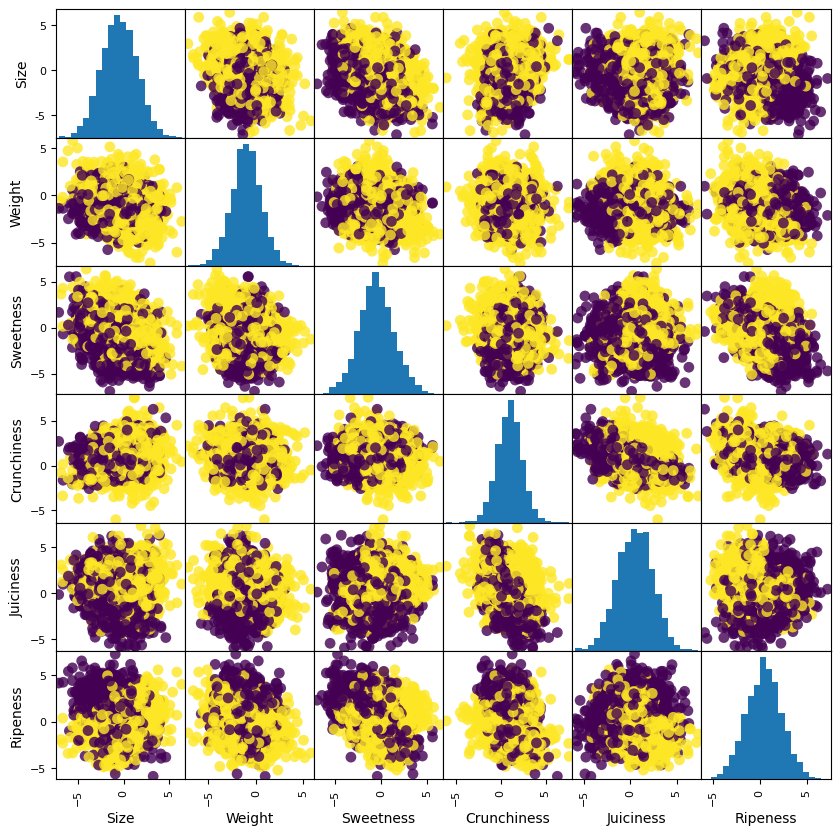

In [33]:
graph=scatter_matrix(df,c=y_train,figsize=(10,10),marker='o',s=60,alpha=.8,hist_kwds={'bins':20})

As we can see from above plot all the data set are intercepting each other so that it will not able to separate each other so we  can't apply k-nn here

## The notebook trains multiple models and evaluates their performance, including K-Nearest Neighbors (KNN), Logistic Regression, Decision Tree, and Support Vector Machine (SVM).

# Kneighborsclassifier

In [34]:
from sklearn.neighbors  import KNeighborsClassifier
model1=KNeighborsClassifier(n_neighbors=1)

In [35]:
model1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [36]:
print('Train:',model1.score(X_train,y_train))
print('Test:', model1.score(X_test,y_test))

Train: 1.0
Test: 0.895


In [37]:
model1a=KNeighborsClassifier(n_neighbors=3)
model1a.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
print('Train:',model1a.score(X_train,y_train))
print('Test:', model1a.score(X_test,y_test))

Train: 0.943125
Test: 0.90125


In [39]:
model1b=KNeighborsClassifier(n_neighbors=10)
model1b.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [40]:
print('Train:',model1b.score(X_train,y_train))
print('Test:', model1b.score(X_test,y_test))

Train: 0.9165625
Test: 0.8975


In [41]:
model1c=KNeighborsClassifier(n_neighbors=20)
model1c.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [42]:
print('Train:',model1c.score(X_train,y_train))
print('Test:', model1c.score(X_test,y_test))   #50 underfitting

Train: 0.9090625
Test: 0.89625


# Linear Regression

when we use regression model for classification the model learning is bad as you can see below

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
model2=LinearRegression().fit(X_train,y_train)

In [45]:
print('Train:',model2.score(X_train,y_train))
print('Test:', model2.score(X_test,y_test)) 

Train: 0.2954481823435694
Test: 0.315839415589248


## Ridge Model

In [46]:
from sklearn.linear_model import Ridge

In [47]:
model2a=Ridge().fit(X_train,y_train)

In [48]:
print('Train:',model2a.score(X_train,y_train))
print('Test:', model2a.score(X_test,y_test)) 

Train: 0.29544817347173424
Test: 0.3158458816243469


In [49]:
model2b=Ridge(alpha=10).fit(X_train,y_train) #control underfitting and overfitting

In [50]:
print('Train:',model2b.score(X_train,y_train))
print('Test:', model2b.score(X_test,y_test)) 

Train: 0.29544729936234226
Test: 0.315902978225022


In [51]:
model2c=Ridge(alpha=0.01).fit(X_train,y_train) #control underfitting and overfitting

In [52]:
print('Train:',model2c.score(X_train,y_train))
print('Test:', model2c.score(X_test,y_test)) 

Train: 0.2954481823426818
Test: 0.3158394803709367


##  Lasso


In [53]:
from sklearn.linear_model import Lasso

In [54]:
model2d=Lasso().fit(X_train,y_train)

In [55]:
print('Train:',model2d.score(X_train,y_train))
print('Test:', model2d.score(X_test,y_test)) 

Train: 0.0
Test: -0.00017229254571016206


In [56]:
model2e=Lasso(alpha=0.01, max_iter=10000).fit(X_train,y_train)

In [57]:
print('Train:',model2e.score(X_train,y_train))
print('Test:', model2e.score(X_test,y_test)) 

Train: 0.2938545783055344
Test: 0.31704459799234264


In [58]:
model2f=Lasso(alpha=1, max_iter=10000000).fit(X_train,y_train)

In [59]:
print('Train:',model2e.score(X_train,y_train))
print('Test:', model2e.score(X_test,y_test)) 

Train: 0.2938545783055344
Test: 0.31704459799234264


# Linear Classifier

## Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
model3=LogisticRegression().fit(X_train,y_train)

In [62]:
print('Train:',model3.score(X_train,y_train))
print('Test:', model3.score(X_test,y_test)) 

Train: 0.7453125
Test: 0.75


In [63]:
model3a=LogisticRegression(C=1000).fit(X_train,y_train)

In [64]:
print('Train:',model3a.score(X_train,y_train))
print('Test:', model3a.score(X_test,y_test)) 

Train: 0.7453125
Test: 0.75


## Linear Svc

In [65]:
from sklearn.svm import LinearSVC

In [66]:
model3b=LinearSVC().fit(X_train,y_train)

C:\Users\Hitesh\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [67]:
print('Train:',model3b.score(X_train,y_train))
print('Test:', model3b.score(X_test,y_test)) 

Train: 0.74625
Test: 0.75125


In [68]:
model3c=LinearSVC(C=50).fit(X_train,y_train)  #C=10 test desc  C=0.1 Same C=0.01  test Desc

C:\Users\Hitesh\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [69]:
print('Train:',model3c.score(X_train,y_train))
print('Test:', model3c.score(X_test,y_test)) 

Train: 0.674375
Test: 0.675


# Naive Bayes Classifier

In [70]:
from sklearn.naive_bayes import GaussianNB

In [71]:
model4=GaussianNB().fit(X_train,y_train)

In [72]:
print('Train:',model4.score(X_train,y_train))
print('Test:', model4.score(X_test,y_test)) 

Train: 0.7503125
Test: 0.7425


In [73]:
from sklearn.naive_bayes import BernoulliNB  #work best binary data

In [74]:
model4a=BernoulliNB().fit(X_train,y_train)

In [75]:
print('Train:',model4a.score(X_train,y_train))
print('Test:', model4a.score(X_test,y_test)) 

Train: 0.6503125
Test: 0.66


In [76]:
from sklearn.naive_bayes import MultinomialNB

In [77]:
## model4c=MultinomialNB().fit(X_train,y_train)    -> Give error it works beston Text type of data as it doesn't feature with negative values

# Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
model5=DecisionTreeClassifier().fit(X_train,y_train)

In [80]:
print('Train:',model5.score(X_train,y_train))
print('Test:', model5.score(X_test,y_test)) 

Train: 1.0
Test: 0.80625


In [83]:
model5a=DecisionTreeClassifier(max_depth=10).fit(X_train,y_train)

In [84]:
print('Train:',model5a.score(X_train,y_train))
print('Test:', model5a.score(X_test,y_test)) 

Train: 0.9334375
Test: 0.7875


In [85]:
depths = [1, 10, 100, 200]  # Renamed list to depths
for i in depths:  # Iterating through the depths list
    model5a = DecisionTreeClassifier(max_depth=i).fit(X_train, y_train)
    print('Train:', i,'depth: ', model5a.score(X_train, y_train))
    print('Test:', i ,'depth: ', model5a.score(X_test, y_test))

Train: 1 depth:  0.6215625
Test: 1 depth:  0.59125
Train: 10 depth:  0.9334375
Test: 10 depth:  0.79
Train: 100 depth:  1.0
Test: 100 depth:  0.79875
Train: 200 depth:  1.0
Test: 200 depth:  0.7975


In [86]:
from sklearn.tree import export_graphviz

In [87]:
export_graphviz(model51,out_file="tree.dot",class_names=['good','bad'],impurity=False, filled=True)

In [88]:
import graphviz

In [89]:
with open("tree.dot") as f:
    dot_graph = f.read()
print(dot_graph)

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="x[4] <= -0.416\nsamples = 3200\nvalue = [1601, 1599]\nclass = good", fillcolor="#ffffff"] ;
1 [label="x[0] <= -0.568\nsamples = 1032\nvalue = [711, 321]\nclass = good", fillcolor="#f1ba92"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="x[1] <= 0.956\nsamples = 467\nvalue = [387, 80]\nclass = good", fillcolor="#ea9b62"] ;
1 -> 2 ;
3 [label="x[2] <= 1.611\nsamples = 406\nvalue = [358, 48]\nclass = good", fillcolor="#e89254"] ;
2 -> 3 ;
4 [label="x[5] <= -1.361\nsamples = 350\nvalue = [321, 29]\nclass = good", fillcolor="#e78c4b"] ;
3 -> 4 ;
5 [label="x[2] <= 0.267\nsamples = 28\nvalue = [15, 13]\nclass = good", fillcolor="#fceee5"] ;
4 -> 5 ;
6 [label="x[6] <= -1.073\nsamples = 18\nvalue = [6, 12]\nclass = bad", fillcolor="#9ccef2"] ;
5 -> 6 ;
7 [label="x[2] <= -2.281\nsamples = 7\nvalue = [5, 2]\nclass = good", fillcolor="#efb388"] ;


In [91]:
def plot_feat(model, X_train):
    n_features = X_train.shape[1]  # Get the number of features
    plt.barh(range(n_features), model.feature_importances_, align='center')  # Use model.feature_importances_
    plt.yticks(range(n_features), X_train.columns.tolist())  # Use range(n_features) instead of np.arange(n_features)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.show()

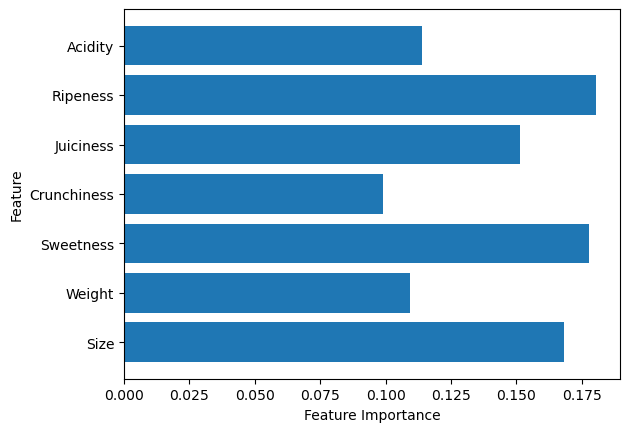

In [92]:
plot_feat(model51,X_train)

# Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
model6=RandomForestClassifier(n_estimators=5)

In [95]:
model6.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [96]:
print('Train:',model6.score(X_train,y_train))
print('Test:', model6.score(X_test,y_test)) 

Train: 0.9878125
Test: 0.84625


In [97]:
n_est=[10,20,50,100]
for i in n_est:
    model=RandomForestClassifier(n_estimators=i)
    model.fit(X_train,y_train)
    print('Train:',[i],model.score(X_train,y_train))
    print('Test:',[i], model.score(X_test,y_test)) 

Train: [10] 0.9965625
Test: [10] 0.87
Train: [20] 0.9978125
Test: [20] 0.86875
Train: [50] 1.0
Test: [50] 0.88375
Train: [100] 1.0
Test: [100] 0.88375


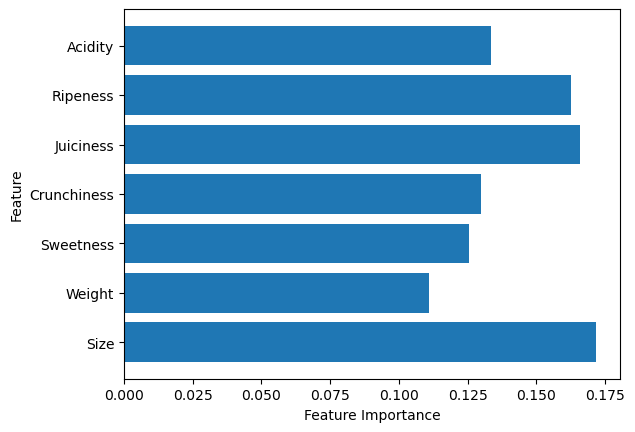

In [98]:
plot_feat(model6,X_train)

# Gradient Boosting Machine

In [99]:
from sklearn.ensemble import GradientBoostingClassifier

In [100]:
model7=GradientBoostingClassifier(random_state=0)

In [101]:
model7.fit(X_train,y_train)

GradientBoostingClassifier(random_state=0)

In [102]:
print('Train:',model7.score(X_train,y_train))
print('Test:', model7.score(X_test,y_test)) 

Train: 0.9059375
Test: 0.8525


In [103]:
n_est=[1,2,5,10]
for i in n_est:
    model=GradientBoostingClassifier(max_depth=i)
    model.fit(X_train,y_train)
    print('Train:',[i],model.score(X_train,y_train))
    print('Test:',[i], model.score(X_test,y_test)) 

Train: [1] 0.785625
Test: [1] 0.755
Train: [2] 0.8665625
Test: [2] 0.8225
Train: [5] 0.9615625
Test: [5] 0.86375
Train: [10] 1.0
Test: [10] 0.87625


# KSVM


In [104]:
from sklearn.svm import LinearSVC

In [105]:
model8=LinearSVC().fit(X_train,y_train)

C:\Users\Hitesh\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [106]:
print('Train:',model8.score(X_train,y_train))
print('Test:', model8.score(X_test,y_test)) 

Train: 0.74625
Test: 0.75125


In [107]:
model8a=LinearSVC(C=0.1).fit(X_train,y_train)

In [108]:
print('Train:',model8a.score(X_train,y_train))
print('Test:', model8a.score(X_test,y_test)) 

Train: 0.74625
Test: 0.75125


In [109]:
# Using Heat Map 

In [110]:
import seaborn as sns


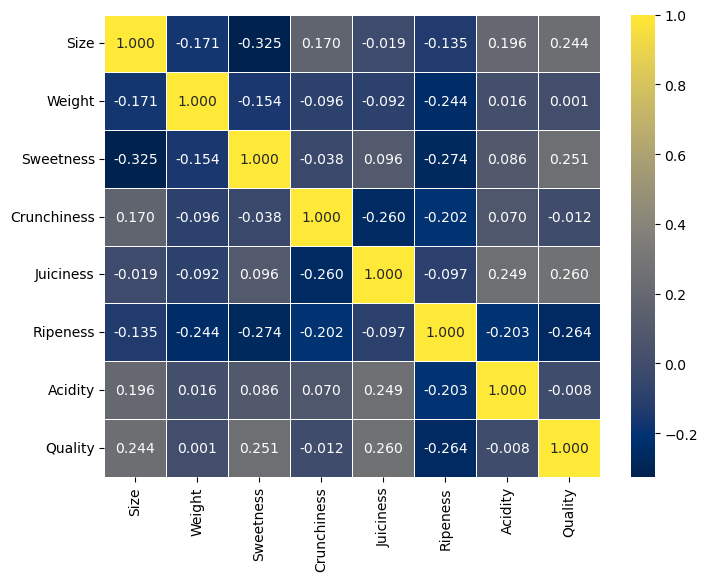

In [111]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, fmt='.3f', linewidths=0.4, cmap="cividis")
plt.show()

In [112]:
feature.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036


In [113]:
feature1=data.drop(['Crunchiness','Weight','Quality'],axis=1)
feature1.head()

,Size,Sweetness,Juiciness,Ripeness,Acidity
0,-3.970049,5.346330,1.844900,0.329840,-0.491590483
1,-1.195217,3.664059,0.853286,0.867530,-0.722809367
2,-0.292024,-1.738429,2.838636,-0.038033,2.621636473
3,-0.657196,1.324874,3.637970,-3.413761,0.790723217
4,1.364217,-0.384658,3.030874,-1.303849,0.501984036


In [114]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1 , y_test1=train_test_split(feature1,target,random_state=10)

In [115]:
model9=LinearSVC().fit(X_train1,y_train1)

C:\Users\Hitesh\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [116]:
print('Train:',model9.score(X_train1,y_train1))
print('Test:', model9.score(X_test1,y_test1)) 

Train: 0.7406666666666667
Test: 0.718


In [117]:
model10=RandomForestClassifier(n_estimators=5).fit(X_train1,y_train1)

In [118]:
print('Train:',model10.score(X_train1,y_train1))
print('Test:', model10.score(X_test1,y_test1)) 

Train: 0.9763333333333334
Test: 0.818
